# Лабораторная работа 3. Описательная статистика


## Ваши данные
Заполните следующую информацию:

*Имя:*
*Фамилия:*
*Электронная почта:*



Виктория Мокрецова mokrietsova46@gmail.com

In [2]:
# imports and setup
import pandas as pd
import scipy as sc
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

C:\Users\Viktoria\AppData\Local\Temp\ipykernel_20772\2756791284.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Часть 3.1: Индекс качества воздуха SLC

В этой задаче изучить качество воздуха в Солт-Лейк-Сити.

### Задача 3.1.0. Узнайте об AQI

Прочтите об [индексе качества воздуха (AQI)](https://www.airnow.gov/aqi/aqi-basics) и
Система [AirNow](https://www.airnow.gov/about-airnow).


### Задача 3.1.1. Скачать данные
Агентство по охране окружающей среды предоставляет доступ к данным о качестве воздуха на веб-сайте AirData. Прочтите о данных, доступных на [этой информационной странице] (https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information). Или скачайте файл `ad_viz_plotval_data.csv` в каталоге задания.


Перейдите на [website] (https://www.epa.gov/outdoor-air-quality-data/download-daily-data) и загрузите следующие ежедневные данные:

+ Pollutant = PM2.5
+ Year = 2023
+ City = Salt Lake City, UT
+ Monitor Site = All Sites

### Задача 3.1.2. Импорт данных. Предобработка данных
Используйте функцию `pandas.read_csv()` для импорта данных.

Предупреждение: эти данные не соответствуют критериям качетсва:

+ Даты не сортируются.
+ Некоторые даты могут иметь пропущенные значения.
+ Некоторые даты могут иметь несколько значений, соответствующих разным датчикам (POC=1,2,3,4,5).

Импорт данных из PDS и era.gov

In [11]:
# Ваш код
df = pd.read_csv('ad_viz_plotval_data.csv')
slc = pd.read_csv('ad_viz_plotval_data_крнт.csv')

Вывод пяти строк датафрейма

In [12]:
df.head(5)

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2023,AQS,490352005,1,4.6,ug/m3 LC,19,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
1,01/02/2023,AQS,490352005,1,4.0,ug/m3 LC,17,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
2,01/03/2023,AQS,490352005,1,12.5,ug/m3 LC,52,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
3,01/04/2023,AQS,490352005,1,9.9,ug/m3 LC,41,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
4,01/05/2023,AQS,490352005,1,2.2,ug/m3 LC,9,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167


Вывод информации о типах данных и количестве пропусков в столбцах датафрейма

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            6514 non-null   object 
 1   Source                          6514 non-null   object 
 2   Site ID                         6514 non-null   int64  
 3   POC                             6514 non-null   int64  
 4   Daily Mean PM2.5 Concentration  6514 non-null   float64
 5   UNITS                           6514 non-null   object 
 6   DAILY_AQI_VALUE                 6514 non-null   int64  
 7   Site Name                       6514 non-null   object 
 8   DAILY_OBS_COUNT                 6514 non-null   int64  
 9   PERCENT_COMPLETE                6514 non-null   float64
 10  AQS_PARAMETER_CODE              6514 non-null   int64  
 11  AQS_PARAMETER_DESC              6514 non-null   object 
 12  CBSA_CODE                       65

Вывод основных статистических параметров о столбцах с числовыми данными

In [14]:
df.describe()

,Site ID,POC,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,CBSA_CODE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE
count,6.514000e+03,6514.000000,6514.000000,6514.000000,6514.0,6514.0,6514.0,6514.0,6514.0,6514.000000,6514.000000,6514.000000
mean,4.903637e+08,2.171323,7.243921,28.064784,1.0,100.0,88101.0,41620.0,49.0,36.105312,40.685918,-111.987452
std,3.041880e+04,1.259437,6.279512,19.298589,0.0,0.0,0.0,0.0,0.0,3.135747,0.097821,0.143387
min,4.903520e+08,1.000000,-0.500000,0.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.496392,-112.355780
25%,4.903530e+08,1.000000,3.800000,16.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.600550,-112.036298
50%,4.903530e+08,2.000000,5.700000,24.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.709762,-111.931000
75%,4.903530e+08,3.000000,7.900000,33.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.777145,-111.894167
max,4.904500e+08,5.000000,52.600000,143.000000,1.0,100.0,88101.0,41620.0,49.0,45.000000,40.807897,-111.872222


Вывод медианы для сравнения

In [15]:
df.median(numeric_only=True).round(1)

Site ID                           490353013.0
POC                                       2.0
Daily Mean PM2.5 Concentration            5.7
DAILY_AQI_VALUE                          24.0
DAILY_OBS_COUNT                           1.0
PERCENT_COMPLETE                        100.0
AQS_PARAMETER_CODE                    88101.0
CBSA_CODE                             41620.0
STATE_CODE                               49.0
COUNTY_CODE                              35.0
SITE_LATITUDE                            40.7
SITE_LONGITUDE                         -111.9
dtype: float64

Проверка второго датафрейма

In [16]:
slc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            6514 non-null   object 
 1   Source                          6514 non-null   object 
 2   Site ID                         6514 non-null   int64  
 3   POC                             6514 non-null   int64  
 4   Daily Mean PM2.5 Concentration  6514 non-null   float64
 5   UNITS                           6514 non-null   object 
 6   DAILY_AQI_VALUE                 6514 non-null   int64  
 7   Site Name                       6514 non-null   object 
 8   DAILY_OBS_COUNT                 6514 non-null   int64  
 9   PERCENT_COMPLETE                6514 non-null   float64
 10  AQS_PARAMETER_CODE              6514 non-null   int64  
 11  AQS_PARAMETER_DESC              6514 non-null   object 
 12  CBSA_CODE                       65

In [17]:
slc.describe()

,Site ID,POC,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,CBSA_CODE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE
count,6.514000e+03,6514.000000,6514.000000,6514.000000,6514.0,6514.0,6514.0,6514.0,6514.0,6514.000000,6514.000000,6514.000000
mean,4.903637e+08,2.171323,7.243829,28.064630,1.0,100.0,88101.0,41620.0,49.0,36.105312,40.685918,-111.987452
std,3.041880e+04,1.259437,6.279180,19.298108,0.0,0.0,0.0,0.0,0.0,3.135747,0.097821,0.143387
min,4.903520e+08,1.000000,-0.500000,0.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.496392,-112.355780
25%,4.903530e+08,1.000000,3.800000,16.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.600550,-112.036298
50%,4.903530e+08,2.000000,5.700000,24.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.709762,-111.931000
75%,4.903530e+08,3.000000,7.900000,33.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.777145,-111.894167
max,4.904500e+08,5.000000,52.600000,143.000000,1.0,100.0,88101.0,41620.0,49.0,45.000000,40.807897,-111.872222


In [18]:
slc.median(numeric_only=True).round(1)

Site ID                           490353013.0
POC                                       2.0
Daily Mean PM2.5 Concentration            5.7
DAILY_AQI_VALUE                          24.0
DAILY_OBS_COUNT                           1.0
PERCENT_COMPLETE                        100.0
AQS_PARAMETER_CODE                    88101.0
CBSA_CODE                             41620.0
STATE_CODE                               49.0
COUNTY_CODE                              35.0
SITE_LATITUDE                            40.7
SITE_LONGITUDE                         -111.9
dtype: float64

df и slc статистически одинаковы

Сортировка датафрейма по дате

In [19]:
df.sort_values(by="Date",ascending=True)

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2023,AQS,490352005,1,4.6,ug/m3 LC,19,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
4340,01/01/2023,AQS,490353015,3,2.8,ug/m3 LC,12,Utah Technical Center,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.777145,-111.945849
4705,01/01/2023,AQS,490353016,1,0.8,ug/m3 LC,3,Inland Port,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.807897,-112.087717
3987,01/01/2023,AQS,490353015,1,3.5,ug/m3 LC,15,Utah Technical Center,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.777145,-111.945849
1080,01/01/2023,AQS,490353006,2,6.8,ug/m3 LC,28,Hawthorne,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.736389,-111.872222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4704,12/31/2023,AQS,490353015,3,26.8,ug/m3 LC,82,Utah Technical Center,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.777145,-111.945849
5069,12/31/2023,AQS,490353016,1,24.4,ug/m3 LC,77,Inland Port,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.807897,-112.087717
5434,12/31/2023,AQS,490354002,1,32.9,ug/m3 LC,95,Near Road,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.662961,-111.901851
2891,12/31/2023,AQS,490353010,3,27.8,ug/m3 LC,84,ROSE PARK,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.784220,-111.931000


Проверка количества каждой уникальной даты, даты не уникальны (количество от 16 до 18)

In [20]:
df['Date'].value_counts()

Date
01/01/2023    18
08/21/2023    18
08/29/2023    18
08/28/2023    18
08/27/2023    18
              ..
06/01/2023    16
04/23/2023    16
09/18/2023    16
04/24/2023    16
09/20/2023    16
Name: count, Length: 365, dtype: int64

Группировка по дате, берем средние значения AQI и PM2.5 

In [21]:
df1 = df[['Date', 'DAILY_AQI_VALUE', 'Daily Mean PM2.5 Concentration']].groupby(by="Date").mean()

In [22]:
df1

,DAILY_AQI_VALUE,Daily Mean PM2.5 Concentration
Date,,
01/01/2023,14.611111,3.494444
01/02/2023,11.000000,2.638889
01/03/2023,40.111111,9.661111
01/04/2023,30.277778,7.277778
01/05/2023,10.555556,2.538889
...,...,...
12/27/2023,57.722222,15.311111
12/28/2023,72.666667,22.400000
12/29/2023,76.222222,24.122222


Конвертируем тип данных столбца Date в дату

In [23]:
df1.index = pd.to_datetime(df1.index)

### Задача 3.1.3. Визуализация данные

1. Данные содержат несколько записей о концентрации PM2,5 и AQI на одну и ту же дату, измеренных на разных объектах и с помощью разных датчиков (POCS). Постройте средние значения PM2,5 и AQI относительно даты на одном графике. Все, кто анализирует график, должен уметь определять: какова средняя концентрация PM 2,5 или значение AQI на конкретную дату.

2. Постройте график зависимости средней концентрации PM 2,5 от даты для двух разных участков (идентификаторы участков — 490352005 и 490353015). Обратите внимание, что в этом случае среднее значение берется по POC. Резудбьтаты для обоих участков должны быть на одном рисунке.
*Подсказка*: использовать функцию `pandas groupby`.


Построение графика

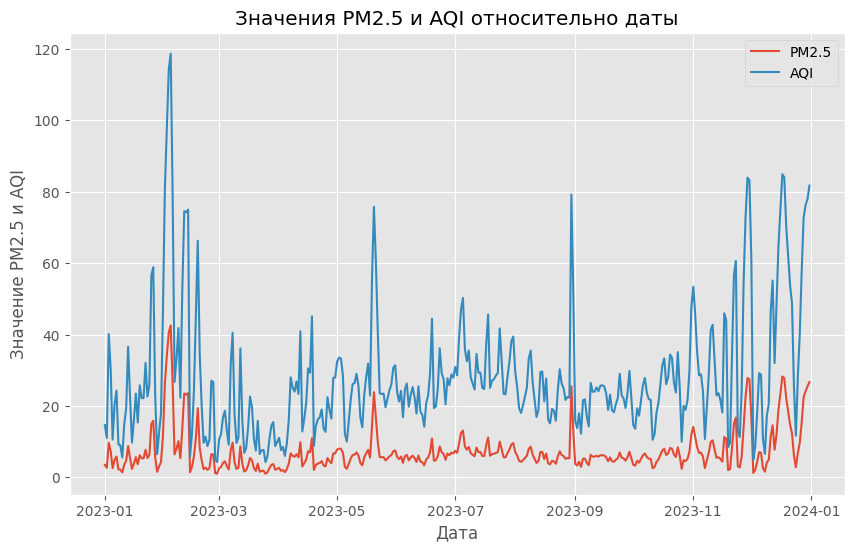

In [24]:
plt.plot(df1.index, df1['Daily Mean PM2.5 Concentration'], label='PM2.5')
plt.plot(df1.index, df1['DAILY_AQI_VALUE'], label='AQI')
plt.xlabel('Дата')
plt.ylabel('Значение PM2.5 и AQI')
plt.title('Значения PM2.5 и AQI относительно даты')
plt.legend()
plt.show()


Создание новых датафреймов для графика, фильтр по индентификаторам участков, группировка по дате и POC 

In [33]:
df2_1 = df[df['Site ID'] == 490352005]
df2_2 = df[df['Site ID'] == 490353015]

group1 = df.groupby(['Date', 'POC'])['Daily Mean PM2.5 Concentration'].mean().reset_index()
group2 = df.groupby(['Date', 'POC'])['Daily Mean PM2.5 Concentration'].mean().reset_index()

Построение графика

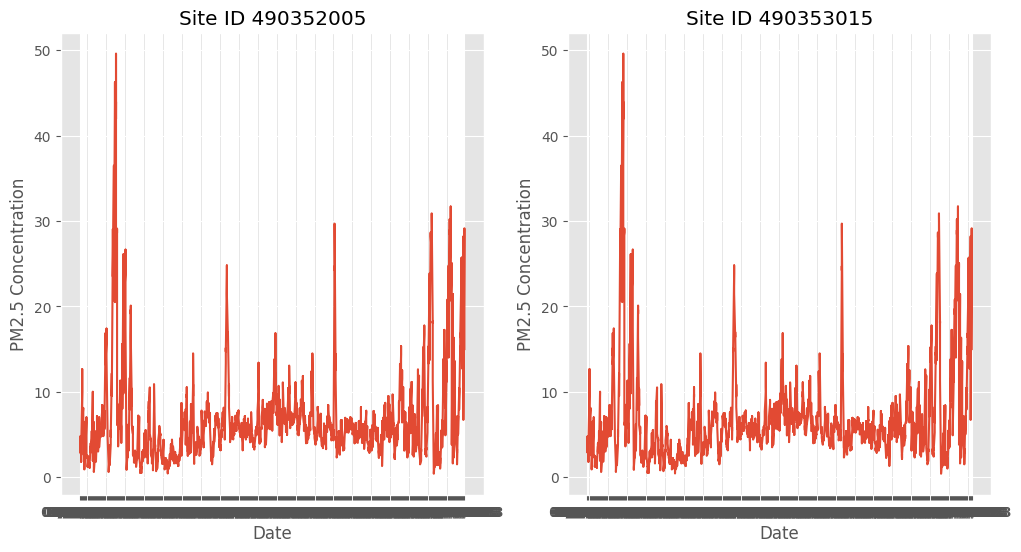

In [34]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(group1['Date'], group1['Daily Mean PM2.5 Concentration'])
plt.title('Site ID 490352005')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')

plt.subplot(1, 2, 2)
plt.plot(group2['Date'], group2['Daily Mean PM2.5 Concentration'])
plt.title('Site ID 490353015')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')

plt.show()

### Задача 3.1.4. Постройте скользящее среднее

Постройте график с дневным значением AQI и скользящим средним для дневного значения AQI. Используйте дневное значение AQI, усредненное по сайтам и POC. Поэкспериментируйте с разными временными диапазонами, чтобы найти наиболее подходящее.

*Подсказка:* Используйте `rolling()`.

Создание новых датафреймов, day_AQI - средние значения AQI по дате, сайтам и POC
rolling_avg - скользящее среднее

In [35]:
day_AQI = df.groupby(['Date', 'Site ID', 'POC'])['DAILY_AQI_VALUE'].mean().reset_index()
day_AQI['Date'] = pd.to_datetime(day_AQI['Date'])
day_AQI['Key'] = day_AQI['POC'].astype(str) + day_AQI['Site ID'].astype(str)
day_AQI.sort_values(by="Key",ascending=True)
rolling_avg = day_AQI.groupby('Date')['DAILY_AQI_VALUE'].mean().rolling(window=7).mean()


In [36]:
day_AQI

,Date,Site ID,POC,DAILY_AQI_VALUE,Key
0,2023-01-01,490352005,1,19.0,1490352005
1,2023-01-01,490352005,4,22.0,4490352005
2,2023-01-01,490353006,1,18.0,1490353006
3,2023-01-01,490353006,2,28.0,2490353006
4,2023-01-01,490353006,4,18.0,4490353006
...,...,...,...,...,...
6509,2023-12-31,490353016,1,77.0,1490353016
6510,2023-12-31,490354002,1,95.0,1490354002
6511,2023-12-31,490354002,3,92.0,3490354002
6512,2023-12-31,490450004,1,67.0,1490450004


Text(0.5, 1.0, 'Дневное значение AQI и скользящее среднее')

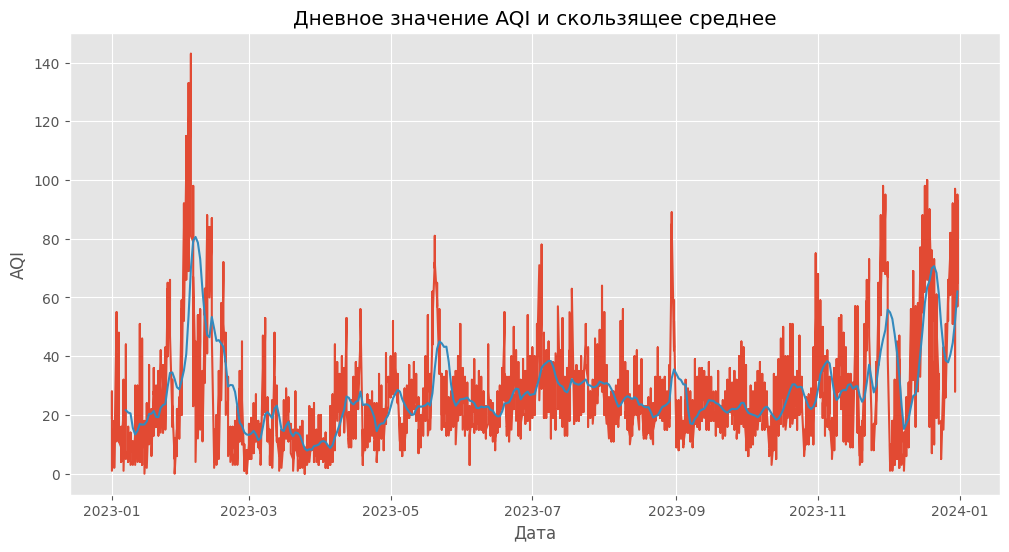

In [37]:

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(day_AQI['Date'], day_AQI['DAILY_AQI_VALUE'], label='Daily AQI')
ax.plot(rolling_avg.index, rolling_avg.values, label='7-Day Rolling Average')
ax.set_xlabel('Дата')
ax.set_ylabel('AQI')
ax.set_title('Дневное значение AQI и скользящее среднее')


Создание графика за один месяц

Text(0.5, 1.0, 'Дневное значение AQI и скользящее среднее')

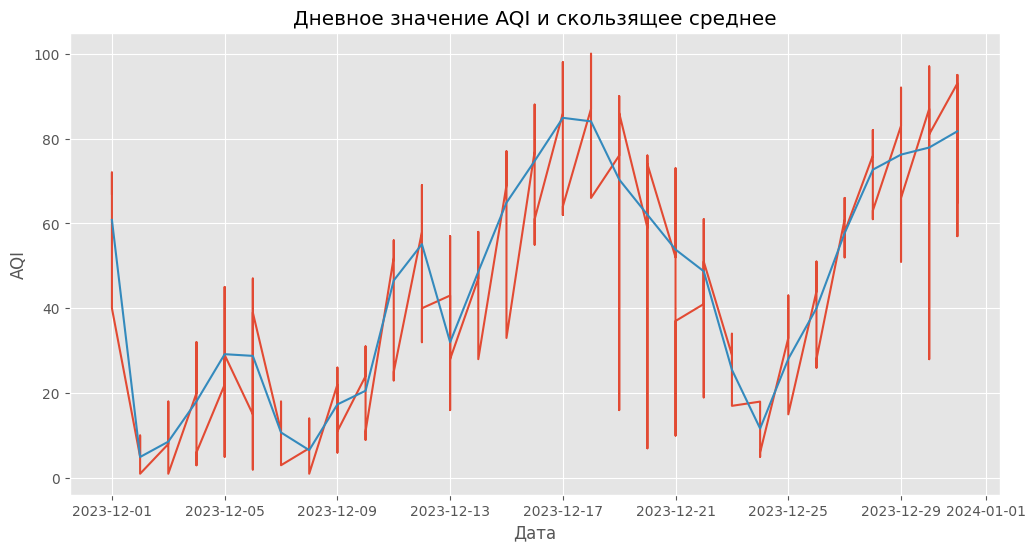

In [125]:
day_AQI = day_AQI[day_AQI['Date'] >= '2023-12-01']
rolling_avg = day_AQI.groupby('Date')['DAILY_AQI_VALUE'].mean().rolling(window=1).mean()
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(day_AQI['Date'], day_AQI['DAILY_AQI_VALUE'], label='Daily AQI')
ax.plot(rolling_avg.index, rolling_avg.values, label='7-Day Rolling Average')
ax.set_xlabel('Дата')
ax.set_ylabel('AQI')
ax.set_title('Дневное значение AQI и скользящее среднее')


Создание графика за один день по Ключу POC и Site ID

Text(0.5, 1.0, 'Дневное значение AQI и скользящее среднее')

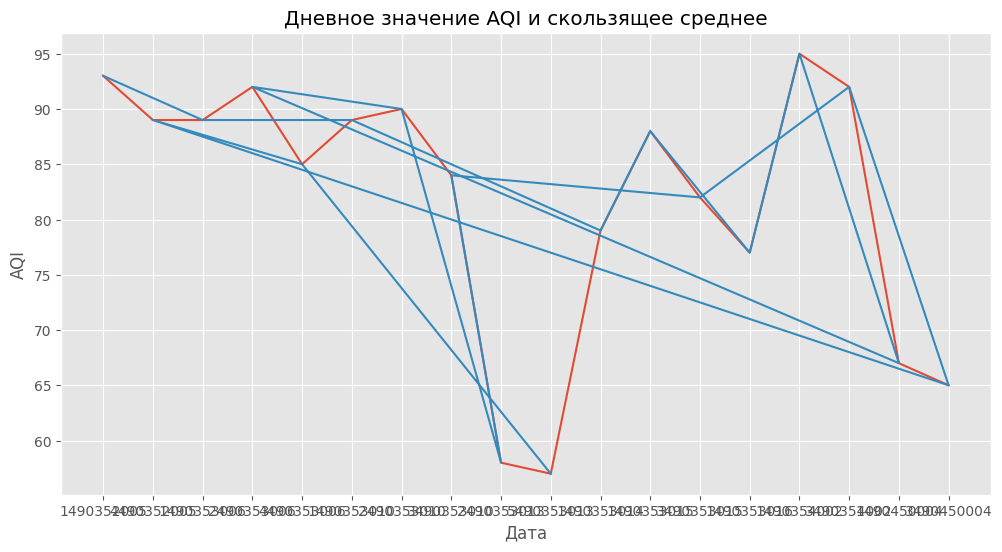

In [126]:
day_AQI = day_AQI[day_AQI['Date'] >= '2023-12-31']
rolling_avg = day_AQI.groupby('Key')['DAILY_AQI_VALUE'].mean().rolling(window=1).mean()
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(day_AQI['Key'], day_AQI['DAILY_AQI_VALUE'], label='Daily AQI')
ax.plot(rolling_avg.index, rolling_avg.values, label='7-Day Rolling Average')
ax.set_xlabel('Дата')
ax.set_ylabel('AQI')
ax.set_title('Дневное значение AQI и скользящее среднее')


## Часть 3.2. A/B-тестирование

Сначала прочитайте статью WIRED об A/B-тестировании [здесь] (http://www.wired.com/2012/04/ff_abtesting/).

Предположим, ваша компания разрабатывает новый логотип. Художественный отдел разрабатывает два логотипа: ‘Logo A’ и ‘Logo B’, показанные ниже.
![](http://www.wired.com/wiredenterprise/wp-content/gallery/20-05/ff_abtesting_f.jpg)

Ваша задача — выяснить, какой логотип лучше.


Вы решаете провести следующий эксперимент. Вы используете рекламу Google, чтобы купить 6000 рекламных объявлений. В $N_A=3000$ объявлений (выбранных случайно) вы используете логотип А, а в остальных $N_B=3000$ объявлениях вы используете логотип Б. Затем вы видите, какой логотип привлекает больше кликов.

Оказывается, $n_A=800$ зрителей с логотипом A нажимают на рекламу, а $n_B=1000$ зрителей с логотипом B нажимают на рекламу. Очевидно, что логотип B показал лучшие результаты в этом тесте, но достаточно ли разница, чтобы сказать, что логотип B лучше? Или, возможно, ‘Logo B’ просто повезло в этом тесте?

Целью этого упражнения будет проведение двухпропорционального z-теста, чтобы определить, лучше ли ‘Logo B’. Шаги будут аналогичны шагам, использованным в эксперименте Солка с полиовакциной в 1954 году (1954 Salk polio-vaccine experiment).


### Задача 3.2.1. Сформулируйте нулевую гипотезу

Пусть $p_A = n_A/N_A$ — доля кликов по логотипу A, и аналогично $p_B$ — доля кликов по логотипу B. В терминах $p_A$ и $p_B$ четко сформулируйте нулевую и альтернативную гипотезы.

**Ваше решение:**
Нулевая гипотеза: $p_A = p_B$, 
Алтернативная гипотеза: $p_A != p_B$

### Задача 2.2. Найдите двухпропорциональное z-значение

Предполагая нулевую гипотезу, мы знаем, что статистика, называемая *двухпропорциональным z-значением*,
$$
Z = \frac{p_A - p_B}{\sqrt{\hat{p} \hat{q} \left( \frac{1}{N_A} + \frac{1}{N_B} \right)}}.
$$
приблизительно распределяется в соответствии со стандартным нормальным распределением. Здесь $\hat{p} = \frac{N_A}{N_A + N_B}p_A + \frac{N_B}{N_A + N_B}p_B$ и $\hat{q} = 1-\hat{p}$.


Найдите двухпропорциональное z-значение.

Создаём переменные по задаче и считаем по формуле значение Z

In [3]:
# Ваш код
na = 800
Na = 3000
nb = 1000
Nb = 3000
pA = na / Na
pB = nb / Nb
p = (Na/(Na+Nb)*pA)+(Nb/(Na+Nb)*pB)
q = 1 - p
z = (pA-pB)/np.sqrt(p*q*((1/Na)+(1/Nb)))
z

-5.6343616981901095

### Задача 2.3. Завершите z-тест двух пропорций

Найдите значение $p$ для проверки гипотезы. Сначала, используя обычную функцию `cdf`, а затем проверьте свой ответ, запустив z-тест двух пропорций в Python с помощью  `proportions_ztest`.

In [8]:
pv = norm.cdf(z)
pv

8.785395076012362e-09

In [5]:
from statsmodels. stats.proportion import proportions_ztest
stat, pval = proportions_ztest(count= np.array([nb, na]), nobs= np.array([Nb, Na]) , value = pB)
print('{0:0.3f}'.format(pval))

0.000


Результатом является p < 0.05, это означает, что мы можем отклонить нулевую гипотезу, принимаем альтернативную, $p_A != p_B$. Следовательно мы можем сказать, что наше исследование проведено успешно и B действительно более интересно для пользователей.